In [1]:
from transformers import T5Tokenizer
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import pandas as pd
import json


#Get the dataframe to index
with open("document_collection.json", "r", encoding = "utf-8") as file:
    data = json.load (file)
df = pd.DataFrame.from_dict(data)

# Prepare dataframe for PyTerrier: needs columns 'docno' and 'text'
corpus_dataframe = df.rename(columns={"para_id": "docno", "context": "text"})[["docno", "text"]]
longest_len = corpus_dataframe["docno"].str.len().max()
longest_len_txt = corpus_dataframe["text"].str.len().max()
print(longest_len, longest_len_txt)

c:\Users\Luigi\miniforge3\envs\retroir\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


47 27001


In [2]:
tokenizer = T5Tokenizer.from_pretrained("t5-base")

def count_t5_tokens(text):
    return len(tokenizer.encode(text, add_special_tokens=False))

tqdm.pandas()  # enable progress bar for pandas

corpus_dataframe["n_tokens"] = corpus_dataframe["text"].progress_apply(count_t5_tokens)

# Inspect
print(corpus_dataframe["n_tokens"].describe())

values = corpus_dataframe["n_tokens"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

percentile = (corpus_dataframe["n_tokens"] <= 512).mean()
print(percentile)


You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
 16%|█▋        | 21729/131921 [00:13<01:08, 1599.38it/s]


KeyboardInterrupt: 

100%|██████████| 131921/131921 [00:01<00:00, 110765.33it/s]


count    131921.000000
mean        217.620356
std          68.872721
min           1.000000
25%         207.000000
50%         224.000000
75%         234.000000
max        4077.000000
Name: n_words, dtype: float64


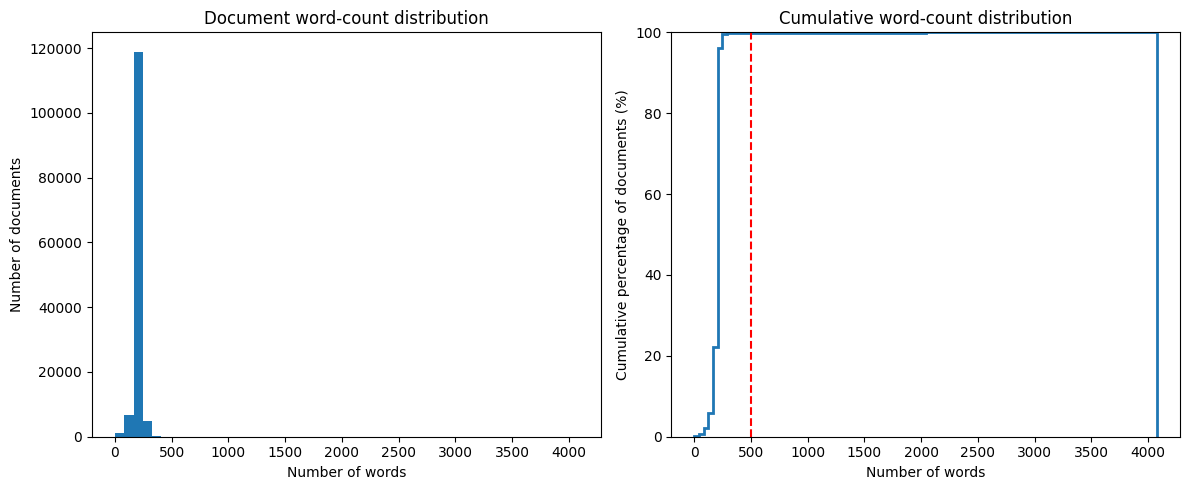

In [ ]:
def count_words(text):
    return len(text.split())

corpus_dataframe["n_words"] = corpus_dataframe["text"].progress_apply(count_words)
print(corpus_dataframe["n_words"].describe())

values_words = corpus_dataframe["n_words"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- Left: standard histogram ---
axes[0].hist(values_words, bins=50)
axes[0].set_xlabel("Number of words")
axes[0].set_ylabel("Number of documents")
axes[0].set_title("Document word-count distribution")

# --- Right: cumulative distribution ---
axes[1].hist(
    values_words,
    bins=100,
    weights=np.ones(len(values_words)) / len(values_words) * 100,
    cumulative=True,
    histtype="step",
    linewidth=2
)
axes[1].set_xlabel("Number of words")
axes[1].set_ylabel("Cumulative percentage of documents (%)")
axes[1].set_title("Cumulative word-count distribution")
axes[1].set_ylim(0, 100)

plt.tight_layout()
plt.show()


In [ ]:

#THUS, CONSIDERING THE TIME INCREASE TO EVALUATE PERFORMANCES, TOKENIZING AND THEN APPLYING A SLIDING WINDOW MAKES ALMOST NO SENSE

# --- Left: standard histogram ---
axes[0].hist(values, bins=50)
axes[0].axvline(512, color="red", linestyle="--")
axes[0].set_xlabel("Number of tokens (T5)")
axes[0].set_ylabel("Number of documents")
axes[0].set_title("Document length distribution")

# --- Right: cumulative distribution ---
axes[1].hist(
    values,
    bins=100,
    weights=np.ones(len(values)) / len(values) * 100,
    cumulative=True,
    histtype="step",
    linewidth=2
)
axes[1].axvline(516, color="red", linestyle="--")
axes[1].set_xlabel("Number of tokens (T5)")
axes[1].set_ylabel("Cumulative percentage of documents (%)")
axes[1].set_title("Cumulative document length distribution")
axes[1].set_ylim(0, 100)

plt.tight_layout()
plt.show()